In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

In [4]:
# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/raagav456/NaanMudhalvanAssignment-1/main/House%20Price%20India.csv')

In [5]:
data

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


#Univariate Analysis

In [6]:
# Select the variable to analyze
variable = data['Price']

In [7]:
# Calculate the mean, median, and mode
mean = np.mean(variable)
median = np.median(variable)
mode = variable.mode()[0]

In [8]:
# Calculate the range and standard deviation
range = np.ptp(variable)
sd = np.std(variable)

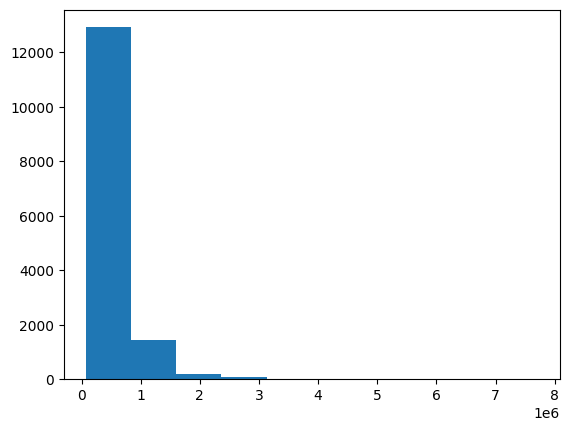

In [9]:
# Create a histogram
plt.hist(variable, bins=10)
plt.show()

In [10]:
# Analyze the skewness and kurtosis
skewness = variable.skew()
kurtosis = variable.kurtosis()

In [11]:
# Draw conclusions about the variable
print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)
print("Range: ", range)
print("Standard deviation: ", sd)
print("Skewness: ", skewness)
print("Kurtosis: ", kurtosis)

Mean:  538932.2183310534
Median:  450000.0
Mode:  450000
Range:  7622000
Standard deviation:  367519.8110821553
Skewness:  4.269297720707116
Kurtosis:  40.32191815363438


#Bivariate Analysis

In [13]:
for col in data.columns:
    print(col)

id
Date
number of bedrooms
number of bathrooms
living area
lot area
number of floors
waterfront present
number of views
condition of the house
grade of the house
Area of the house(excluding basement)
Area of the basement
Built Year
Renovation Year
Postal Code
Lattitude
Longitude
living_area_renov
lot_area_renov
Number of schools nearby
Distance from the airport
Price


In [14]:
# Select the variables to analyze
x = data['living area']
y = data['Price']

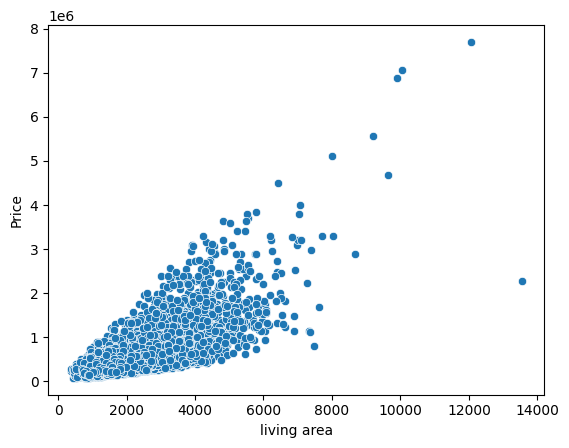

In [17]:
# Create a scatter plot
sns.scatterplot(x=x, y=y)
plt.show()

In [18]:
# Calculate the correlation coefficient and p-value
corr_coef, p_value = pearsonr(x, y)

In [19]:
# Test for statistical significance
alpha = 0.05
if p_value < alpha:
    print("The relationship is statistically significant")
else:
    print("The relationship is not statistically significant")

The relationship is statistically significant


In [20]:
# Draw conclusions about the relationship between the two variables
print("Correlation coefficient: ", corr_coef)

Correlation coefficient:  0.7121694766782514


#MultiVariate Analysis

In [24]:
# Select the variables to analyze
variables = data[['lot area', 'number of bedrooms', 'number of bathrooms', 'number of floors']]

In [25]:
# Standardize the variables
standardized_variables = (variables - variables.mean()) / variables.std()

In [26]:
# Perform principal component analysis
pca = PCA()
pca.fit(standardized_variables)

PCA()

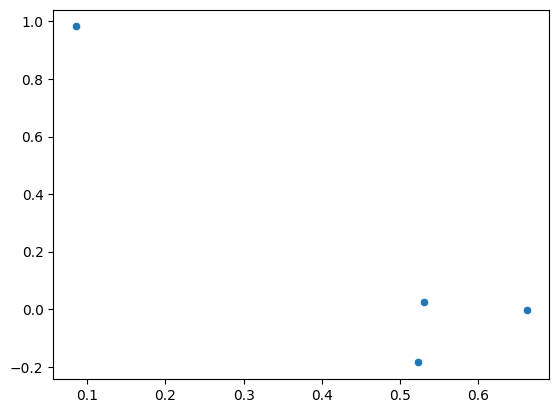

In [27]:
# Visualize the results
sns.scatterplot(x=pca.components_[0], y=pca.components_[1])
plt.show()

In [28]:
# Interpret the results
print("Explained variance ratios: ", pca.explained_variance_ratio_)

Explained variance ratios:  [0.45404375 0.25038954 0.20464537 0.09092134]
